# HW-1: Scalar regression

*Author:* J. Hickman

* In this homework, we will work through a parametric statistical learning problem from start to finish from scratch.
* Much of this can be done more easily with Sk-Learn, or other libraries. However, the assignment is meant to be educational.
* We want you to understand what is happening "under the hood", and understand the "training" process at a fundamental level.
* This is not just an academic exercise, this is very similar to a typical deep-learning work-flow (e.g in Keras or PyTorch)
* If you apply for deep learning jobs, you will be expected to be very familiar with all the components of this workflow. 
   
**Instructions** 

* Read and work through all tutorial content and do all exercises below
  
**Submission:**

* You need to upload ONE document to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of this notebook 
* The final uploaded version should NOT have any code-errors present 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc


# Part-1: Analytical assignment

* The following is some "pen and paper" work to get started

## HW-1.1: Relevant mathematics review  

* Work through the following math problems relevant to optimization and statistical learning (show your work and all steps)

* You can do this either by (1) doing the math inside `.ipynb` using LaTex (recommended) OR (2) doing it with pen and paper (or ipad), taking photographs, and embedding the solutions into the .ipynb as images, before you upload.

![](img/2023-01-22-22-45-35.png)

### Compute the Gradient Vector for a plane in 3D Space: $$z = f(x,y) = ax + by + c$$
Answer: $$\nabla f(x,y) = (\frac{\partial z}{\partial x},\frac{\partial z}{\partial y}) = (a, b)$$

### Compute the Gradient Vector for a hyperplane: $$z = f(\mathbf x) = f(x_1, x_2, \dots, x_n) = \sum_{i=1}^{N} a_i(x_i - b_i) + S = a_1x_1 + a_2x_2 + \dots + a_nx_n + d$$

Answer: $$\nabla f(\mathbf x) = (\frac{\partial z}{\partial x}) = \sum_{i=1}^{N} a_i$$

### Compute partial derivative of parabaloid function $$z = f(x,y) = A(x-x_0)^2 + B(y - y_0)^2 + C$$
Answer: $$f_x(x,y) = (\frac{\partial f(x,y)}{\partial x})_y = 2A - 2Ax_0$$
        $$f_y(x,y) = (\frac{\partial f(x,y)}{\partial y})_x = 2B - 2By_0$$

### Compute the following quantities and specify the shape of the output, if an operation is not defined then say "not defined"

Answer: $$x^T = \begin {pmatrix}3 & 1 & 4 \end{pmatrix}: shape =  [1 \times 3] \space matrix$$ 
        $$y^T = \begin {pmatrix} 2 \\ 5 \\ 1 \end {pmatrix}: shape =  [3 \times 1] \space matrix$$
        $$ x \cdot x = 25$$
        $$ x \cdot y^T = 15$$
        $$ x \times y = \begin{pmatrix}6 & 15 & 3\\ 2 & 5 & 1\\ 8 & 20 & 4 \end{pmatrix}: shape = [3 \times 3] \space matrix$$
        $$y \times x = \begin{pmatrix}15\end{pmatrix}: shape = [1 \times 1] \space matrix$$
        $$A \times x = \begin{pmatrix}25 \\ 30 \\34 \end{pmatrix}: shape =  [3 \times 1] \space matrix$$
        $$A \times B = \begin{pmatrix}39 & 38 \\ 19 & 37 \\41 & 50 \end{pmatrix}: shape =  [3 \times 2] \space matrix$$
        $$B.reshape(1,6) = \begin{pmatrix} 3 & 5 & 5 & 2 & 1 & 4 \end{pmatrix}: shape =  [1 \times 6] \space matrix$$

## HW-1.2: Least square derivation 


### Required 

![](img/2023-01-23-09-42-26.png)

### Optional

![](img/2023-01-23-09-42-56.png)

### Linear least squares: Single-variable


$$L(p) = L(m,b) =  \sum_{i=1}^{N}(\hat{y_i} - (m\hat{x_i} + b))^2$$


$$\frac{\partial L(m,b)}{\partial m} = -2 * \sum_{i=1}^{N}(\hat{x_i}(\hat{y_i} - m\hat{x_i} - b)) =   0$$
$$\frac{\partial L(m,b)}{\partial b} = -2\sum_{i=1}^{N}(\hat{y_i} - m\hat{x_i} - b) = -2 \sum_{i=1}^{N}(\hat{y_i}) + 2m \sum_{i=1}^{N}(\hat{x_i}) + 2Nb = 0$$

Solving for m and b we get:

$$b = \frac{\sum_{i=1}^{N}(\hat{y_i}) - m \sum_{i=1}^{N}(\hat{x_i})}{N}$$

$$\sum_{i=1}^{N}(\hat{x_i}(\hat{y_i} - m\hat{x_i} - b)) = \sum_{i=1}^{N}(\hat{x_i}(\hat{y_i} - m\hat{x_i} - (\bar{y} - m\bar{x}))) = \sum_{i=1}^{N}(\hat{x_i}(\hat{y_i} - \bar{y} - m(\hat{x_i} - \bar{x})))$$

$$= \sum_{i=1}^{N}\hat{x_i}(\hat{y_i} - \bar{y}) - m\sum_{i=1}^{N}\hat{x_i}(\hat{x_i} - \bar{x})$$

$$m = \frac{\sum_{i=1}^{N}\hat{x_i}(\hat{y_i} - \bar{y})}{\sum_{i=1}^{N}\hat{x_i}(\hat{x_i} - \bar{x})} = \frac{\sum_{i=1}^{N}(\hat{x_i} - \bar{x})(\hat{y_i} - \bar{y})}{\sum_{i=1}^{N}(\hat{x_i} - \bar{x})^2}$$



# Part-2: Coding the optimizer

## Import

In [200]:
import  pandas  as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from   scipy.optimize import minimize

## HW-1.3 Multi-variable gradient decent

* In a function call `minimizer`
* Generalize the single variable gradient descent algorithm to the case of multiple variables 
* In this case the parameter $w_i$ becomes a vector $\mathbf w_i$ (i.e. a numpy array)
* This is also the case for the derivative, which becomes the gradient (another numpy array)
$$\mathbf \nabla L = \left(\frac{\partial L}{\partial w_0},\frac{\partial L}{\partial w_1} \dots \frac{\partial L}{\partial w_N}\right)$$
* Each term in the gradient can be calculated by keeping all variables constant, except one, and applying the finite difference formula. 
* For example, consider just two variables, and computing $\frac{\partial L}{\partial w_0}$
  * $\mathbf w_i=(w_{i,0},w_{i,1})$
  * The perturbation for $w_0$ is $\mathbf \Delta w_0=(\Delta w,0)$ and $\mathbf \Delta w_1=(0,\Delta w)$ for $w_1$
  * the component of the gradient would be $\frac{\partial L}{\partial w_0}\approx \frac{L(\mathbf w_i+\mathbf \Delta w_0)-L(\mathbf w_i-\mathbf \Delta w_0)}{2\Delta w}$
  * where $\Delta w$ is a small number (hyper-parameter)
* Your code should be fully general and work for a $\mathbf w$ of arbitrary dimension
* **Optional:** Try extending the GD algorithm to `momentum` or `RMSprop`. 
  * These algorithms are similar to GD but are superior in several ways, and more common in deep learning.

In [201]:
# INSERT YOUR CODE HERE
def minimizer(l,wi,LR=0.001,tol=0.00001):
	# STEP SIZE
	dw=0.0001

	# NUMBER OF ITERATIONS 		
	imax=100000

	# LOOP THROUGH EACH ELEMENT OF wi TO CALCULATE GRADIENT VECTOR	
	# OPTIMIZATION LOOP
	a=0 	 
	while a <= imax:
		dL_dw = np.zeros_like(wi)	
		for i in range(len(wi)):
			# COMPUTE PRETURBATION OF wi
			deltas = np.zeros(len(wi))
			deltas[i] = dw
			# COMPUTE GRADIENT USING CENTRAL FORMULA
			dL_dw[i]=(l(wi + deltas)-l(wi- deltas))/(2*dw)
		# APPLY NEWTON'S METHOD
		wip1=wi-LR*dL_dw
		# STOPPING CRITERION 
		if(np.absolute(l(wip1) - l(wi))<tol):
			wi = wip1
			break
		# UPDATE
		wi = wip1
		a=a+1
	return wi

## Sanity check

* As a sanity check, find the minimum using SciPy of a scalar field with FOUR dependent variables. 

* i.e. find $(w_0,w_1,w_2,w_3)$ which minimize $L(w_0,w_1,w_2,w_3)$
* **Note:** There is no limit to the dimensionality, we could use the exact same procedure to minimize a scalar function of 512 variables $L(w_0,w_1, \dots, w_2,w_{511})$, it would just be slower 
  
* Use the following simple example to bench-mark your algorithm 
  

In [202]:
# DEFINE FUNCTION
def L4(w_i):
    # (w0,w1,w2,w3) --> L TYPE OBJECTIVE FUNCTION
    return 8.343+(w_i[0]-3)**2.0+(w_i[1]-4)**2+(w_i[2]-10)**2+(w_i[3]-(-5))**2

# EXPECTED
print("EXPECTED ANSWER --> (w0,w1,w2,w3)=(3,4,10,-5)  with L((3,4,10,-5))=8.343")

# INITIAL GUESS 
w_0=np.array([0.1,0.1,0.1,0.1])
print("INITIAL GUESS: w_0 =",w_0)

# RUN MINIMIZER
res = minimize(L4, w_0, method='BFGS', tol=1e-15)

# PRINT RESULT
w_opt=res.x
print("NUMERICAL SOLUTION: w_opt =",w_opt)
print(" L(w_opt) =",L4(w_opt))

EXPECTED ANSWER --> (w0,w1,w2,w3)=(3,4,10,-5)  with L((3,4,10,-5))=8.343
INITIAL GUESS: w_0 = [0.1 0.1 0.1 0.1]
NUMERICAL SOLUTION: w_opt = [ 2.99999999  3.99999998 10.         -5.        ]
 L(w_opt) = 8.343


## HW-1.4: Test your function

* Apply your minimizer to the L4 objective function, your solutions should match those found with SciPy

In [203]:
res = minimizer(L4, w_0)
print("NUMERICAL SOLUTION: w_opt =",res)
print(" L(w_opt) =",L4(res))

NUMERICAL SOLUTION: w_opt = [ 2.98809488  3.98398966  9.95935838 -4.97906341]
 L(w_opt) = 8.345488145105106


# Part-2: Regression

## Download the data

* The Auto MPG dataset
* The dataset is available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).
* First download and import the dataset using pandas:


In [204]:

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)


## Numerically explore the data 

In [205]:
#GENERAL STUFF THAT IS 
print("----------------------")
print("GENERAL:")
print("----------------------")
print("number of rows:", len(df.index))
print("number of col:",  len(df.columns))
print("keys:",  df.keys(),type(df.keys()))
print("info",df.info() )
print("head", df.head())
print("TYPES", df.dtypes)

print("----------------------")
print("BASIC STATISTICS:")
print("----------------------")
print(df.describe())

print("----------------------")
print("CORRELATION MATRIX:")
print("----------------------")
print(df.corr())

----------------------
GENERAL:
----------------------
number of rows: 398
number of col: 8
keys: Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object') <class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB
info None
head     MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0  

## HW-1.5: Visually explore the data
* Reproduce the following plots with seaborn

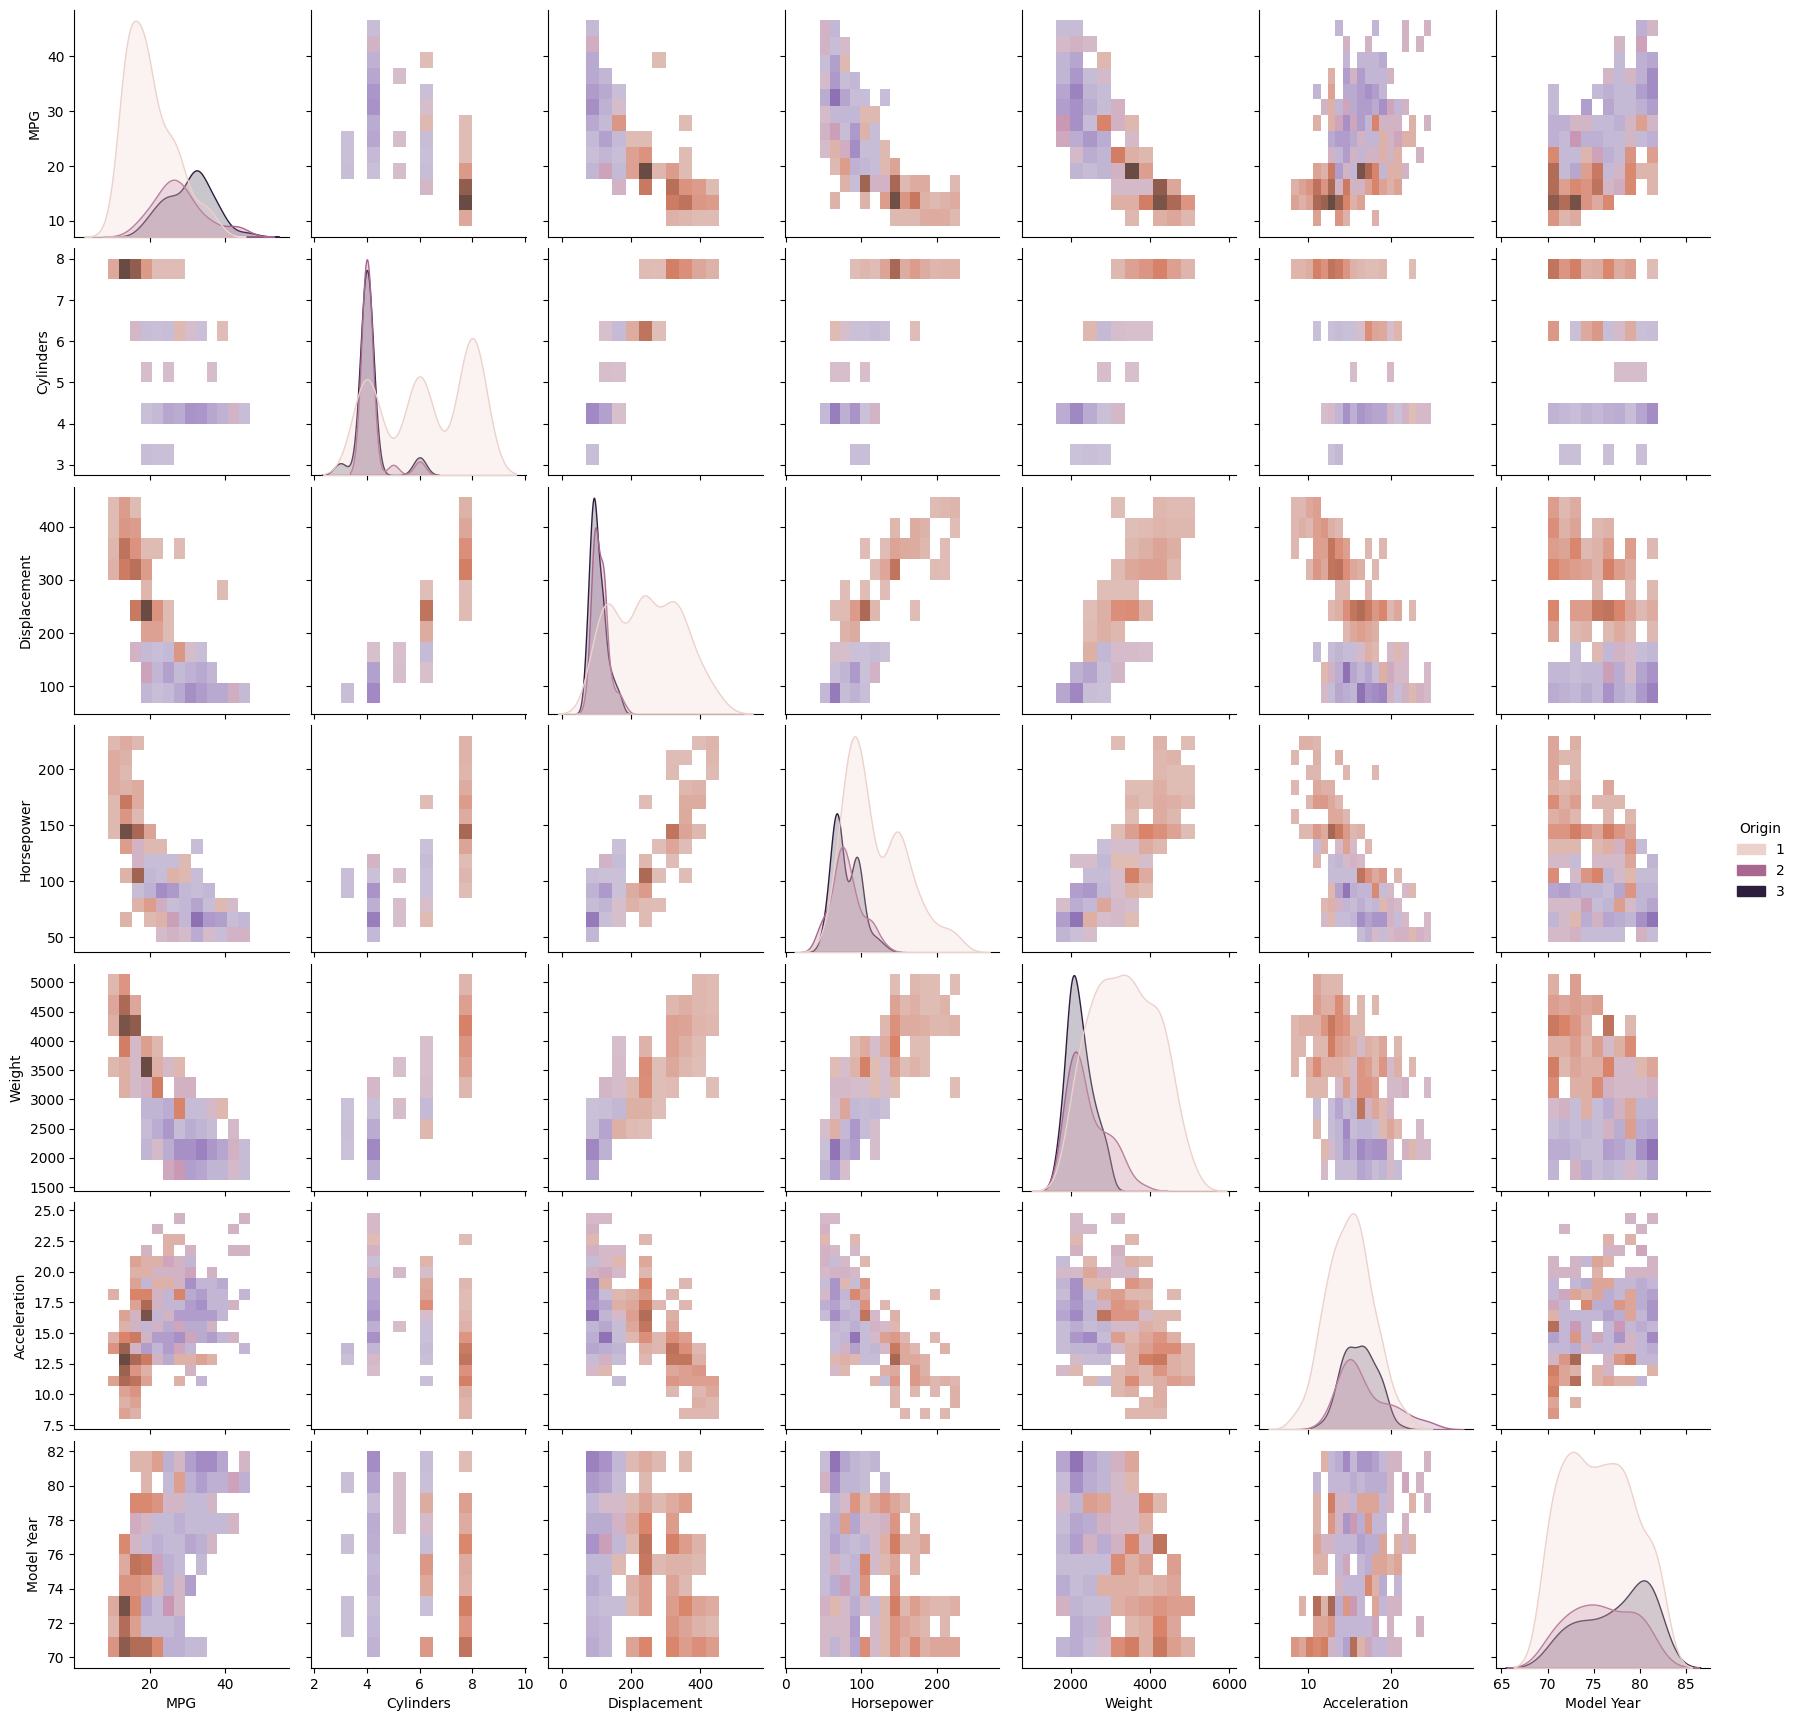

In [229]:
HUE='Origin'

sns.pairplot(df, hue = HUE, kind = 'hist', diag_kind = 'kde')


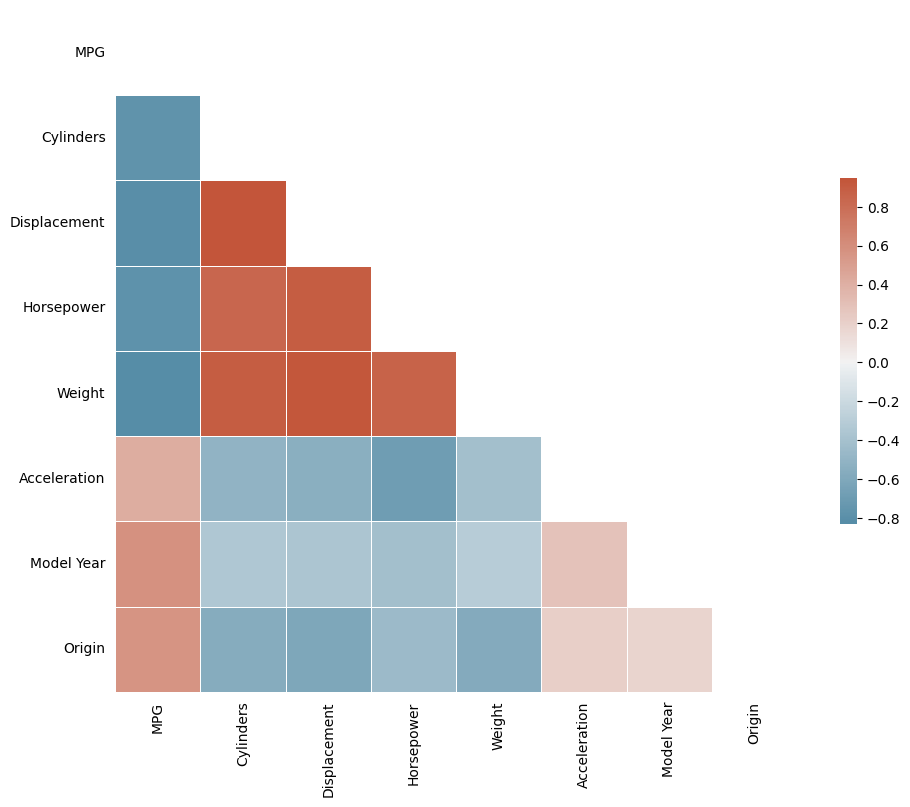

In [232]:
# COMPUTE CORRELATION MATRIX
c = df.corr()

# MASK UPPER TRIANGLE
mask = np.triu(np.ones_like(c, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(c, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5})
ax.tick_params(left=False, bottom=False)

## HW-1.6: Short answer 
* Assuming MPG is your target regression variable $y$
* Do some manual feature selection (i.e. keep features that are correlated with the target and remove highly correlated features) 
* Which are the features $x$ would be best to keep, and which can be thrown away?
* Justify your answer for each feature

Based on the correlelogram I would keep the variables Weight, Horsepower, Cylinders, and Acceleration. I would get rid of origin and model year due to their lack of correlation with the target variable. Displacement can be thrown away because although it is highly correlated with the target, it also has a >= .9 correlation with Weight, Horsepower, and Cylinders. The rest are kept due to high correlations with the target variable and likely addition of new and relevant information to predict MPG.


## HW-1.7: Set up the data for regression

* Regardless of what you put in the short answer sections 
* Please use the following columns of the data-frame `[1,2,3,4,5]` as the input x features, and column `0` for y.
* This is to ensure consistency across the various student's solutions 
* Extract these portions of the data-frame and store them as numpy arrays


In [208]:
# INSERT CODE TO EXTRACT THE RELEVANT SUB-MATRICES
x_col=[1,2,3,4,5]
y_col=[0]
x = df.iloc[:,x_col]
y = df.iloc[:,y_col]

In [209]:
# YOUR DATA SHOULD BE IN NUMPY ARRAYS WITH THE FOLLOWING SHAPE
print(y.shape)
print(x.shape)

(398, 1)
(398, 5)


In [210]:
#INSERT CODE TO REMOVE ANY NAN IF PRESENT
indices = list(np.where(x.isna())[0])
x = x.drop(indices, axis = 0)
y = y.drop(indices, axis = 0)

In [211]:
# RE-PRINT THE SHAPE
print(y.shape)
print(x.shape)

(392, 1)
(392, 5)


In [212]:
# INSERT CODE TO STORE THE MEAN AND STD FOR LATER NORMALIZATION
x_mean = x.mean().tolist()
x_std = x.std().tolist()
y_mean = y.mean().tolist()
y_std = y.std().tolist()

In [213]:
#INSERT CODE TO PARTITION THE DATA INTO AN 80-20 SPLIT
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2)

In [214]:
# RE-PRINT THE SHAPES
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)


(313, 5) (313, 1)
(79, 5) (79, 1)


In [215]:
#INSERT CODE TO NORMALIZE THE TRAINING AND VALIDATION DATA 
x_train = (x_train - x_mean)/x_std
x_val = (x_val - x_mean)/x_std
y_train = (y_train - y_mean)/y_std
y_val = (y_val - y_mean)/y_std

## HW-1.8: Model fitting
* Here we will use our optimizer from part-1 to train a multi-variable model using linear regression 
* For this model, With N features, their will be N+1 fitting parameters
* Indexing from one
    * $y_{pred}=w_{N+1}+w_1 x_1+w_2 x_2+ \dots + w_{N} x_{N}$
    * $w_{N+1}$ being the bias (intercept)
* Indexing from zero 
    * $y_{pred}=w_N+w_0 x_0+w_1 x_1+ \dots + w_{N-1} x_{N-1}$
    * $w_{N}$ being the bias (intercept)
* Note that this model can be applied to `x_train` with one line of numpy code

In [216]:
# INSERT CODE TO TRAIN THE MODEL
## Adding column of 1's for the intercept
x_new = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
x_val_new = np.hstack((np.ones((x_val.shape[0], 1)), x_val))
def train_model(x_train, l, LR, tol):
    # INITIAL GUESS 
    w_0= np.random.rand(6)
    params = minimizer(l,w_0,LR,tol)
    return params

In [217]:
# INSERT CODE FOR THE LOSS FUNCTION
# DEFINE FUNCTION
def L6(w_i):
    y_pred = np.dot(x_new, w_i)
    rmse = np.sqrt(np.mean((y_train['MPG'] - y_pred)**2))
    return rmse
# NOTE YOU MAY NEED TO RESHAPE y_pred SO THAT IT IS THE SAME SHAPE AS y_train

In [218]:
#INSERT CODE TO FIT THE MODEL
# I FOUND THE FOLLOWING HYPER-PARAMETERS WORKED WELL (LR=0.01, tol=10**-10)
# ALTHOUGH YOURS MIGHT NEED TUNING DEPENDING ON HOW YOU CODED THE OPTIMIZER
def model(x_train, params):
    # Make predictions using the weights
    y_pred = np.dot(x_train, params)
    return y_pred

#TRAIN THE MODEL
w_final = train_model(x_new, L6, LR = .01, tol = 10**-13)

In [219]:
# MAKE PREDICTIONS
y_train_pred=model(x_new,w_final)
y_val_pred=model(x_val_new,w_final)

## HW-1.9: Visualize the results

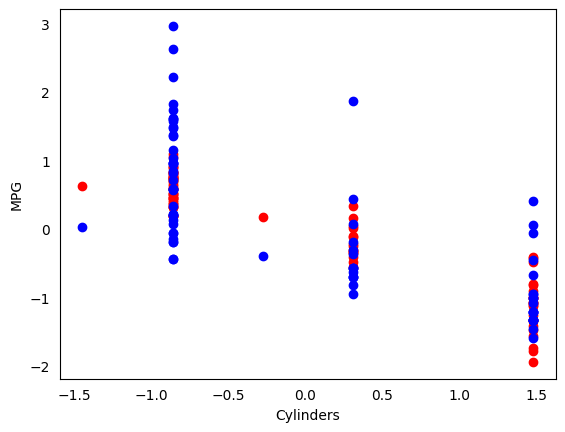

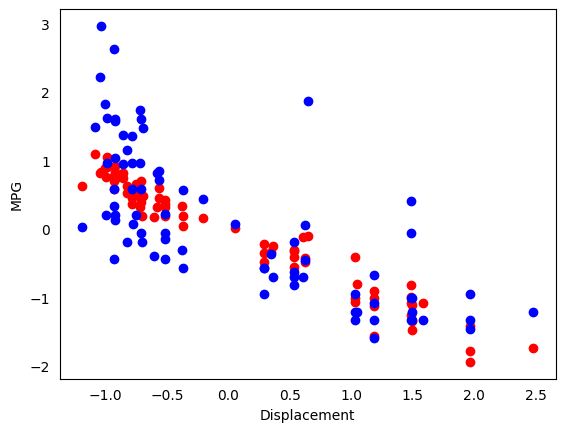

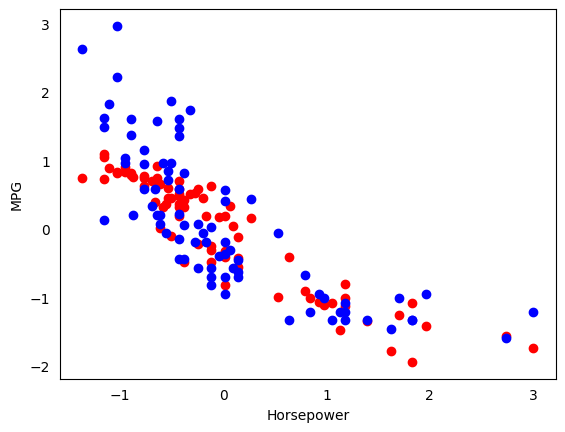

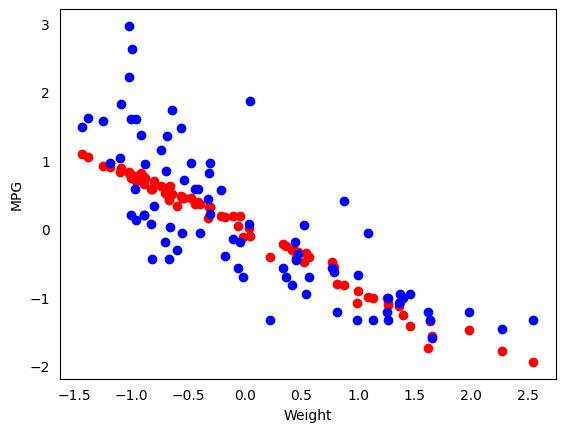

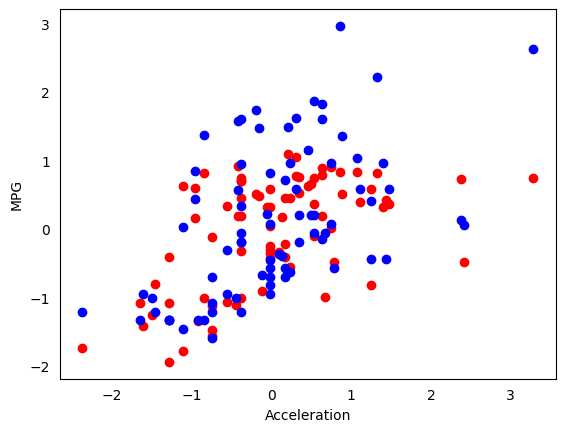

In [220]:
# INSERT CODE TO PLOT MPG VS EACH OF THE VARIOUS FEATURES  (DO WITH A LOOP)
# USE BLUE=DATA AND RED=PREDICTION (DO ONLY FOR UNTRAINED VALIDATION SET)
for i in x_val.columns.tolist():
    plt.scatter(x_val[i], y_val_pred, color = 'red')
    plt.scatter(x_val[i], y_val['MPG'], color = 'blue')
    plt.tick_params(left=False, bottom=False)
    plt.xlabel(i)
    plt.ylabel('MPG')
    plt.show()

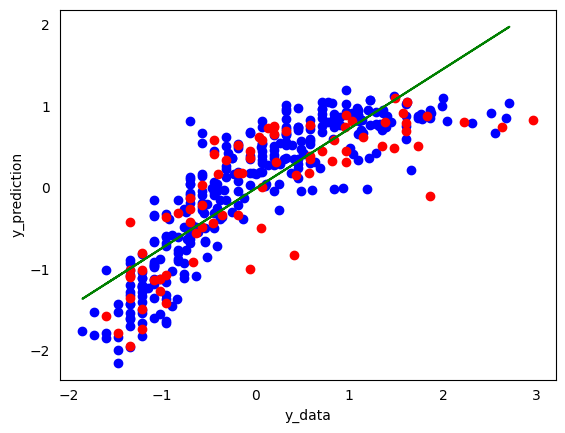

In [221]:
## INSERT CODE FOR A PARITY PLOT (i.e. y_train vs y_train_pred AND  y_val vs y_val_pred) 
# USE RED FOR VALIDATION DATA AND BLUE FOR TRAINING
fig, ax = plt.subplots(1,1)
ax.scatter(y_train, y_train_pred, color = 'blue')
ax.scatter(y_val, y_val_pred, color = 'red')
#calculate equation for trendline
z = np.polyfit(y_train['MPG'], y_train_pred, 1)
p = np.poly1d(z)

#add trendline to plot
ax.plot(y_train, p(y_train), color = 'green')
ax.tick_params(left=False, bottom=False)
plt.ylabel('y_prediction')
plt.xlabel('y_data')
plt.show()

## HW-1.10: Sanity check-1

* Now lets check our parameter estimates using Sk-Learn
  
* Implement linear regression with Sk-Learn using `x_train, y_train` 
* Print estimate prediction for the  weights and bias results 
* This can be found in just a few lines. 
* **IMPORTANT**: Your parameter estimates should match those predicted by the numerical optimization process above

In [222]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)
print("Coefficients = ", reg.coef_[0])
print("Bias = ", reg.intercept_)
full_weights = reg.intercept_
full_weights = np.append(full_weights, reg.coef_[0])
print("My Params =", w_final)
print("Difference = ", np.absolute(w_final - full_weights))

Coefficients =  [-0.03243758 -0.16723366 -0.18581871 -0.49742142 -0.04949649]
Bias =  [-0.02549434]
My Params = [-0.02549437 -0.03241668 -0.16726934 -0.18581174 -0.49741296 -0.04949708]
Difference =  [2.79936749e-08 2.08946504e-05 3.56787410e-05 6.96162908e-06
 8.46219217e-06 5.88389716e-07]


## HW-1.11: Sanity check-2

* Finally, let's check our parameter estimates using the multi-variable formula derived in the optional section of Part-1: $\mathbf w = (\mathbf x^T \mathbf x)^{-1} \mathbf x^T y$

*  **IMPORTANT:** Remember that these parameters from this formula are still "learned" through an optimization process, however the optimization is done with pen and paper, not numerically. 
* To use this formula you need to add a "constant feature", a columns of ones, to the x_train matrix to account for the bias parameter 
  * `x_train[0,:]=[A,B,C]` $\rightarrow$ `x_train[0,:]=[0,A,B,C]`
  * `x_train[1,:]=[A,B,C]` $\rightarrow$ `x_train[1,:]=[0,A,B,C]`
  *  ... etc
*  You also need to take the transpose `x.T`, the inverse `np.linalg.inv()`, and three matrix products `np.matmul`
*  Using the `y_train` and the modified `x_train`, your numbers should match Sk-Learn perfectly (because this is the formula that Sk-Learn uses, NOT numerical optimization) 


In [223]:
## Deriving the vector of w's - y is transposed simply because as is it is inverted from what it should be - end result is trasnposed for easy viewing
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(x_new.T, x_new)),x_new.T), np.matrix(y_train['MPG']).T).T
print(w)
print(full_weights)

[[-0.02549434 -0.03243758 -0.16723366 -0.18581871 -0.49742142 -0.04949649]]
[-0.02549434 -0.03243758 -0.16723366 -0.18581871 -0.49742142 -0.04949649]
